In [30]:
%load_ext autoreload
%autoreload 2
%pylab inline
import pandas as pd
import glob
import seaborn as sns
import pyspiel
import os
import json
from analysis_tools import *
from open_spiel.python.algorithms import cfr, outcome_sampling_mccfr, expected_game_score, exploitability, get_all_states_with_policy
import itertools

sns.set(font_scale=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [22]:
DIRS = '/shared/cfr/parking/1/*/reduced_strategy.csv'
experiments = glob.glob(DIRS)


Expected Allocation B  Expected Allocation A  \
player type                                                         
0      v150,0b121.0               0.000021               0.500119   
1      v0,150b130.0               0.999963               0.000011   
2      v150,0b110.0               0.000013               0.000027   
       v150,0b130.0               0.000003               0.499842   

                     Expected Utility  
player type                            
0      v150,0b121.0         24.375851  
1      v0,150b130.0         31.783305  
2      v150,0b110.0         -0.000384  
       v150,0b130.0         14.495235

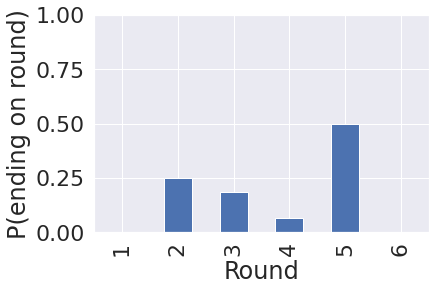

<Figure size 432x288 with 0 Axes>

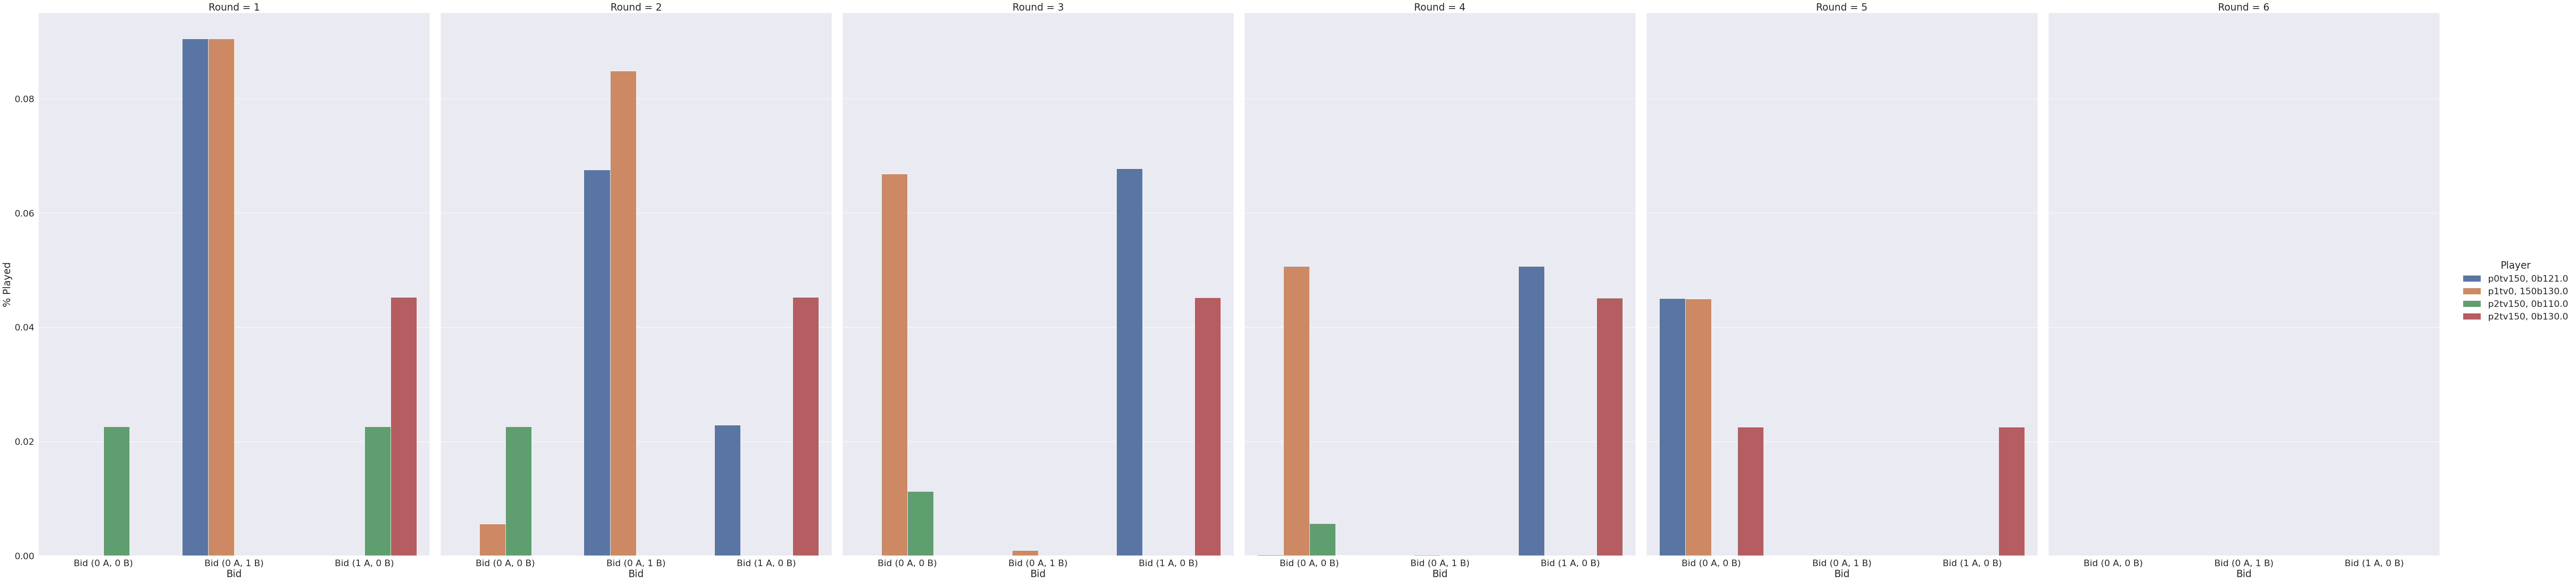

In [32]:
for experiment in experiments:
    df = pd.read_csv(experiment)
    round_probs(df)
    plt.figure()
    display(expected_values_over_types(df))
    action_df = normalized_action_df(df)
    g = sns.catplot(x="Bid", y="% Played", hue="Player", col="Round", data=action_df, kind="bar", height=20, aspect=.7);
    plt.savefig('probs.png', dpi=300)
    break

In [8]:
df = pd.read_csv('/shared/cfr/parking/1/mccfr_1_1/reduced_strategy.csv')

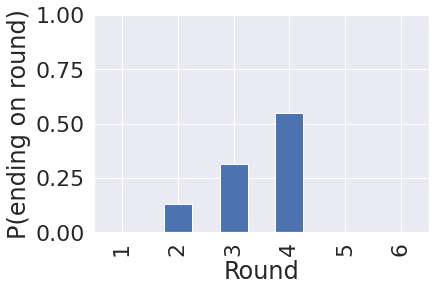

In [9]:
round_probs(df)

In [193]:
expected_values_over_types(df)

Expected Allocation A  Expected Allocation B  \
player type                                                         
0      v150,0b121.0               0.464417               0.029559   
1      v0,150b130.0               0.017904               0.666651   
2      v150,0b110.0               0.012178               0.000720   
       v150,0b130.0               0.129894               0.008233   

                     Expected Utility  
player type                            
0      v150,0b121.0         10.853134  
1      v0,150b130.0         21.506002  
2      v150,0b110.0          0.412643  
       v150,0b130.0          2.890675

In [87]:
df.columns

Index(['info_state', 'player', 'Allocation 0 A', 'Allocation 0 B',
       'Allocation 1 A', 'Allocation 1 B', 'Allocation 2 A', 'Allocation 2 B',
       'Bid (0 A, 0 B)', 'Bid (0 A, 1 B)', 'Bid (1 A, 0 B)', 'Price A',
       'Price B', 'Utility 0', 'Utility 1', 'Utility 2', 'budget', 'my_bids',
       'prob', 'round', 'terminal', 'total_demand', 'value'],
      dtype='object')

In [24]:
action_df = to_action_df(df)

In [197]:
# Above is unconditional of reaching that round. This renormlizes

def normalize(df):
    normalizer = df['% Played'].sum()
    df['% Played'] /= normalizer
    return df

action_df = action_df.groupby(['Round', 'Player']).apply(normalize)

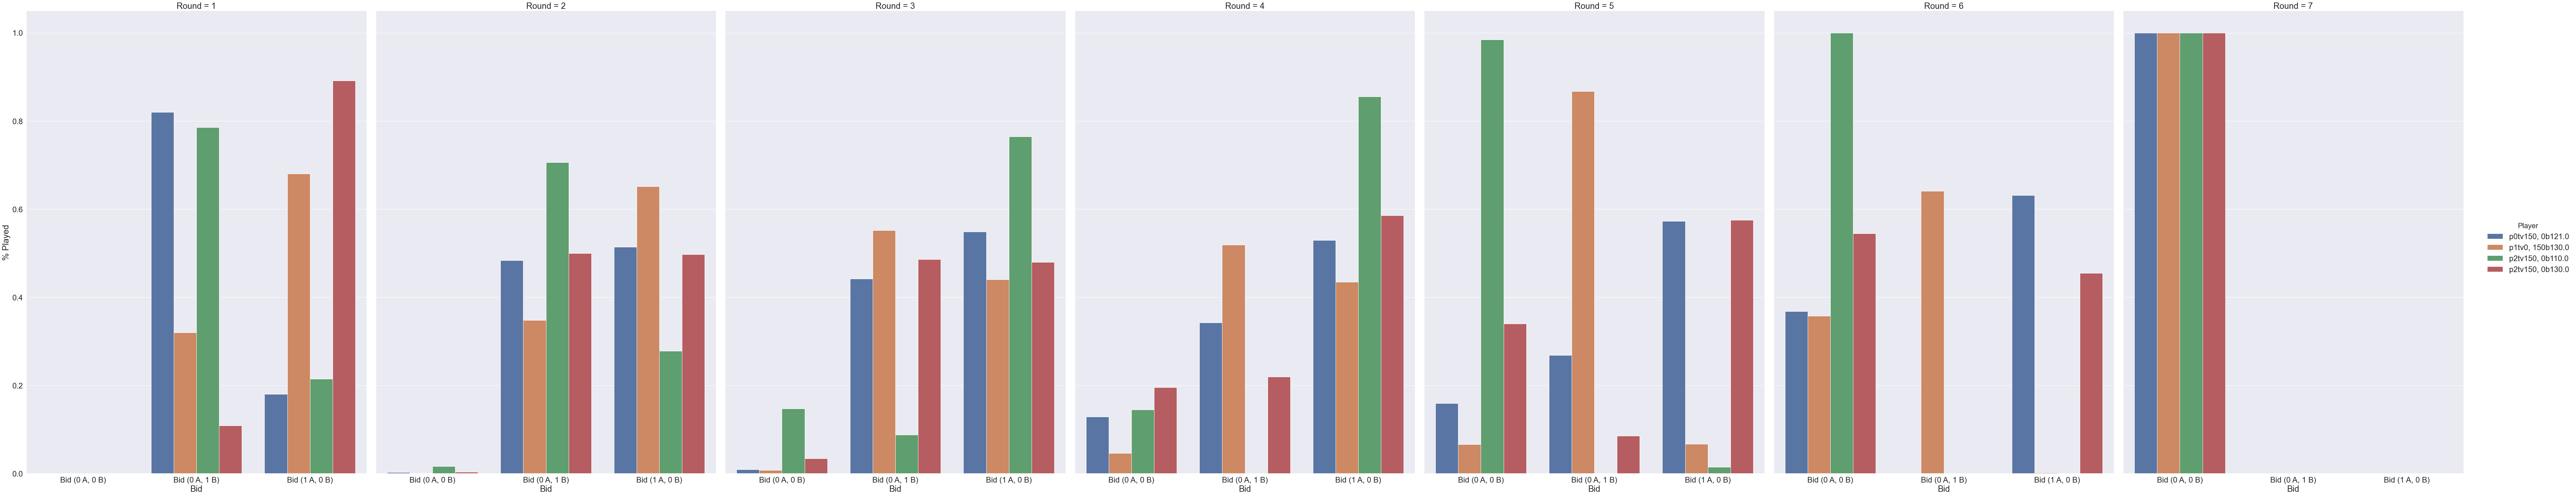

In [198]:
g = sns.cat plot(x="Bid", y="% Played", hue="Player", col="Round", data=action_df, kind="bar", height=20, aspect=.7);
plt.savefig('probs.png', dpi=300)

In [23]:
alloc_cols = [c for c in df.columns if 'Allocation' in c]
goods = set([re.match(r'Allocation \d ([A-Z])', g).groups()[0] for g in alloc_cols])
goods

{'A', 'B'}

In [75]:
### How many info sets really don't need to exist, and what fraction are they of the total?
strat = pd.read_csv('/Users/newmanne/research/cfr/tmp/strategy.csv')
waste = strat.query('~terminal').query('`Bid (0 A, 0 B)` == 1').copy()
waste = waste[(pd.isnull(waste['Bid (1 A, 0 B)'])) & (pd.isnull(waste['Bid (0 A, 1 B)']))]

In [78]:
len(waste) / len(strat.query('~terminal'))

0.7364618330262636

In [77]:
len(waste)/len(strat)

0.7260747230829505

In [199]:
### Is this infoset straightforward?

# Given prices
# Given activity
# Given budget

# 1) Solve a profit maximization MIP at each Infoset to see what the "straightforward" move is
# 2) If you add back undersell, concerned this is no longer obvious

# Answer will almost certainly be that you mix strategies: so then what? - A threshold or something

# Only non-single action, non-terminal nodes needed for checking


# Everyone keeps doing what they are doing, each individual player deviates to straightforward, are you better off?


# Look at all the EQ you can find 
    # Ask: If you believe that these are plausible, what does this say about good initial round actions?
    
        # HOW SHOULD YOU DETERMINE THE MIXTURE? Many EQ will look simiilar
        # Are EQs best thought of as trees, or tables?
    
    # Believe opponent will play noisy version of some EQ strategy
        # Sample from equilbria 
        
# And then if you want to advise a bidder, isn't that a good recommendation? Really study this particular strategy - "solves" equilibrium selection
# Can I "distinguish" opponents?

# Train against mixuture
    # - Then opponent optimizes against me?
    
# Do well against worst? Against avergae?
# Swap roles and add to set?
# How much does your best response change?


NameError: name 'all_states' is not defined